「RとStanで始めるベイズ統計モデリングによるデータ分析入門 実践編第3章」を対象に，公開されているR，Stanのコードをpython，pystanのコードへと書き直した一例です。Stanの代わりにpystanを，bayesplotの代わりにarvizパッケージを利用しています。

本ページでは公開されていない書籍の内容については一切触れません。理論や詳しい説明は書籍を参照してください。

なお，こちらで紹介しているコードには誤りが含まれる可能性があります。内容やコードについてお気づきの点等ございましたら，ご指摘いただけると幸いです。

# 分析の準備

## パッケージの読み込み

In [1]:
import arviz
import pystan
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Meiryo'

## 分析対象のデータ

In [2]:
file_beer_sales_2 = pd.read_csv('3-2-1-beer-sales-2.csv')

## サンプルサイズ

In [3]:
sample_size = len(file_beer_sales_2)

# 予測のためのデータの整理

## 気温を11度から30度まで変化させて、その時の売り上げを予測する

In [4]:
temperature_pred = np.linspace(start=11, stop=30, num=20)
print(temperature_pred)

[11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30.]


## dictにまとめる

rstanでは入力データをlist形式にまとめたのに対し，pystanでは入力データをdictionary形式にまとめる。

In [5]:
data_list_pred = dict(N=sample_size,
                      sales=file_beer_sales_2['sales'],
                      temperature=file_beer_sales_2['temperature'],
                      N_pred=len(temperature_pred),
                      temperature_pred=temperature_pred)

# MCMCの実行

## MCMCの実行

In [6]:
mcmc_result_pred = pystan.stan(file='3-3-1-simple-lm-pred.stan',
                               data=data_list_pred,
                               seed=1,
                               n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b9ba45baf41873b2dc42b9a64b7e03ff NOW.


## 結果の表示

In [7]:
print(mcmc_result_pred.stansummary(probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_b9ba45baf41873b2dc42b9a64b7e03ff.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
Intercept       20.85    0.16   5.94    8.8   20.9  32.12   1431    1.0
beta             2.48  7.8e-3   0.29   1.92   2.47   3.07   1395    1.0
sigma           17.08    0.03   1.22  14.94  17.01  19.66   1995    1.0
mu_pred[1]      48.09    0.07   3.03  42.09  48.15  53.77   1668    1.0
mu_pred[2]      50.57    0.07   2.79  45.02  50.65  55.81   1744    1.0
mu_pred[3]      53.05    0.06   2.57  47.98  53.11  57.93   1849    1.0
mu_pred[4]      55.52    0.05   2.36  50.87  55.58  60.04   1999    1.0
mu_pred[5]       58.0    0.05   2.17  53.76  58.04  62.18   2209    1.0
mu_pred[6]      60.48    0.04    2.0  56.61  60.51  64.35   2496    1.0
mu_pred[7]      62.96    0.03   1.87  59.32  62.97  66.58   2910    1.0
mu_pred[8]      65.

# 予測分布の図示

## MCMCサンプルの抽出

ただし，bayseplotの代わりにarvizを利用するので抽出したMCMCサンプルは利用しない。

In [8]:
mcmc_sample_pred = mcmc_result_pred.extract()

## 気温が11度～30度まで1度ずつ変えたの時の予測売り上げの95%予測区間の図示

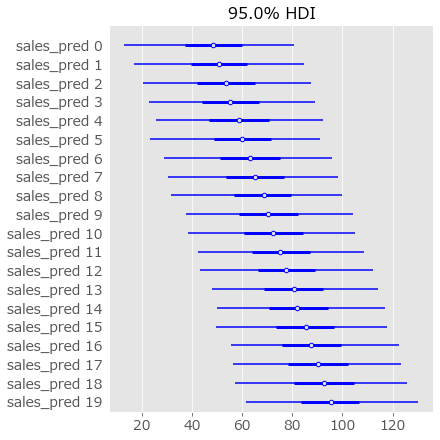

In [130]:
arviz.plot_forest(mcmc_result_pred,
                  var_names=["sales_pred"],
                  hdi_prob=0.95,
                  combined=True,
                  colors='b');

## 95%区間の比較

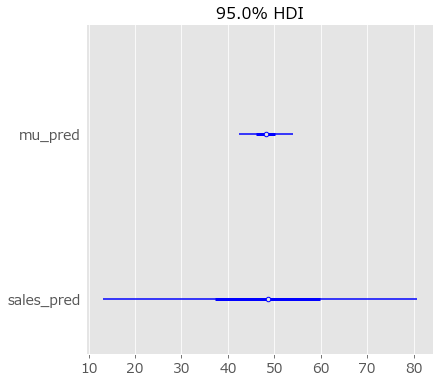

In [129]:
arviz.plot_forest(mcmc_result_pred,
                  var_names=['mu_pred', 'sales_pred'],
                  coords={'mu_pred_dim_0': 0,
                          'sales_pred_dim_0': 0},
                  hdi_prob=0.95,
                  combined=True,
                  colors='b');

## 気温が11度と30度の時の、売り上げの予測分布

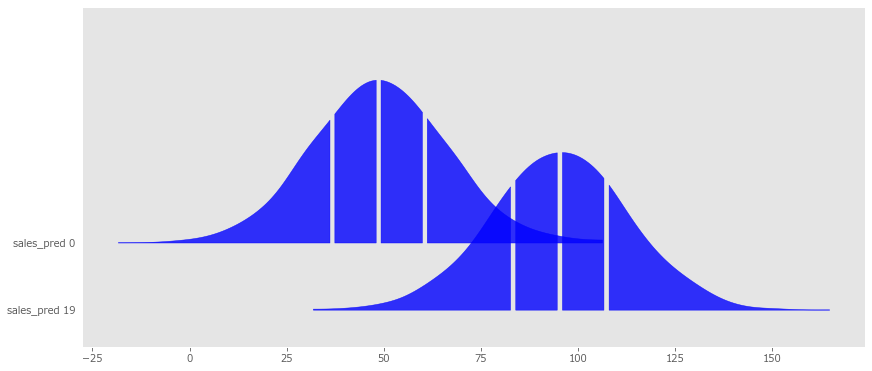

In [128]:
arviz.plot_forest(mcmc_result_pred,
                  var_names=['sales_pred'],
                  coords={'sales_pred_dim_0': [0, 19]},
                  kind='ridgeplot',
                  hdi_prob=0.95,
                  combined=True,
                  ridgeplot_alpha=0.8,
                  ridgeplot_quantiles=[.25, .5, .75],
                  colors='blue');